### Feature Selection-Information Gain-Mutual Information in Regression Problem Statements
#### Mutual Information

Estimate mutual information for a continuous target variable

Mutual Information(MI) between two random variables is a non - negative value, which measures the dependency between the variables.
It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on non parametric methods based on entropy estimation from k-nearest neighbors distances.

Mutual  information is calculated between two variables and measures the reduction in uncertainity for one variable given a
known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows :

#### I(X;Y)=H(X)-H(X|Y)  Where I(X;Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X|Y) is the conditional entropy for X given Y.The results has the units of bits. Bits value is between 0 to 1.

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Houseprice/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
## Considering the numerical column and skipping the categorical column time being to show Information Gain with respect to continous target variable
## Code to Select only numeric features 
numeric_lst = ['int16','int32','int64','float16','float32','float64']
numeric_cols = list(df.select_dtypes(include=numeric_lst).columns)


In [5]:
numeric_lst

['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [6]:
numeric_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [7]:
housing_df = df[numeric_cols]

In [8]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
housing_df=housing_df.drop("Id", axis =1)

In [10]:
### It is always good practice to split train and test data to prevent or avoid Overfitting

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(housing_df.drop(labels=["SalePrice"],axis =1), housing_df["SalePrice"], test_size=0.30, random_state = 0)

In [11]:
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [12]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [15]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
# Fill here missing value with zero just to show mutual gain wrt regression. We can use feature engineering like mean/median to fill missing valu also
mutual_info = mutual_info_regression(X_train.fillna(0),y_train)
mutual_info

array([0.25156731, 0.21196934, 0.16610673, 0.52837978, 0.10730143,
       0.34886057, 0.24460488, 0.10150794, 0.15666702, 0.        ,
       0.11089817, 0.38430672, 0.31332946, 0.22622473, 0.        ,
       0.48315752, 0.02951791, 0.        , 0.26062016, 0.08462843,
       0.04227756, 0.01126058, 0.20201468, 0.18107256, 0.26975986,
       0.37757441, 0.36651699, 0.06774279, 0.16405094, 0.01053645,
       0.        , 0.01738683, 0.        , 0.        , 0.        ,
       0.00693624])

In [17]:
mutual_info = pd.Series(mutual_info)
mutual_info.index =  X_train.columns
mutual_info.sort_values(ascending = False)

OverallQual      0.528380
GrLivArea        0.483158
TotalBsmtSF      0.384307
GarageCars       0.377574
GarageArea       0.366517
YearBuilt        0.348861
1stFlrSF         0.313329
GarageYrBlt      0.269760
FullBath         0.260620
MSSubClass       0.251567
YearRemodAdd     0.244605
2ndFlrSF         0.226225
LotFrontage      0.211969
TotRmsAbvGrd     0.202015
Fireplaces       0.181073
LotArea          0.166107
OpenPorchSF      0.164051
BsmtFinSF1       0.156667
BsmtUnfSF        0.110898
OverallCond      0.107301
MasVnrArea       0.101508
HalfBath         0.084628
WoodDeckSF       0.067743
BedroomAbvGr     0.042278
BsmtFullBath     0.029518
ScreenPorch      0.017387
KitchenAbvGr     0.011261
EnclosedPorch    0.010536
YrSold           0.006936
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
MoSold           0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
BsmtHalfBath     0.000000
dtype: float64

In [18]:
mutual_data = pd.Series(mutual_info,X_train.columns)
mutual_data.sort_values(ascending = False)


OverallQual      0.528380
GrLivArea        0.483158
TotalBsmtSF      0.384307
GarageCars       0.377574
GarageArea       0.366517
YearBuilt        0.348861
1stFlrSF         0.313329
GarageYrBlt      0.269760
FullBath         0.260620
MSSubClass       0.251567
YearRemodAdd     0.244605
2ndFlrSF         0.226225
LotFrontage      0.211969
TotRmsAbvGrd     0.202015
Fireplaces       0.181073
LotArea          0.166107
OpenPorchSF      0.164051
BsmtFinSF1       0.156667
BsmtUnfSF        0.110898
OverallCond      0.107301
MasVnrArea       0.101508
HalfBath         0.084628
WoodDeckSF       0.067743
BedroomAbvGr     0.042278
BsmtFullBath     0.029518
ScreenPorch      0.017387
KitchenAbvGr     0.011261
EnclosedPorch    0.010536
YrSold           0.006936
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
MoSold           0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
BsmtHalfBath     0.000000
dtype: float64

#### We can take top 10 or top 20 percentile or first top 10 or 20 features from above mutual info

<AxesSubplot:>

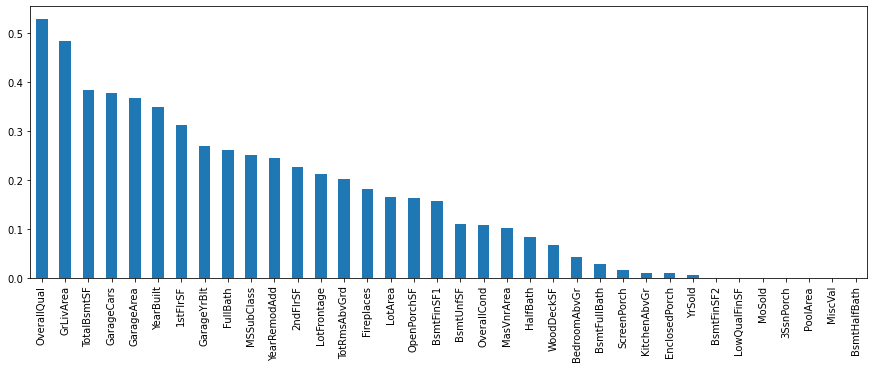

In [20]:
## Plot bar graph for all above features
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [26]:
import sklearn.feature_selection import SelectPercentile


SyntaxError: invalid syntax (<ipython-input-26-9fdfa062c3e9>, line 1)

In [25]:
## select top features using percentile
## select top 20 percentile features
selected_top_columns=selectPercentile(mutual_info_regression, percentile = 20)
selected_top_columns.fit(X_train.fillna(0),y_train)
X_train.columns[selected_top_columns.get_support()]


NameError: name 'selectPercentile' is not defined

#### Difference between Information Gain and Mutual Gain

I(X;Y)=H(X)-H(X|Y) and  IG(S,a) = H(S) - H(S|a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, 
they calculate the same quantity if applied to the same data.